# Matplotlib图鉴——基础箱线图

## 公众号：可视化图鉴

In [2]:
import matplotlib
print(matplotlib.__version__) #查看Matplotlib版本
import pandas as pd
print(pd.__version__) #查看pandas版本
import numpy as np
print(np.__version__) #查看numpy版本
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['STHeiti'] #设置中文

3.3.3
1.2.0
1.19.4


注意，代码在以下环境全部通过测试:
- Python 3.7.1
- Matplotlib == 3.3.3
- pandas == 1.2.0
- numpy == 1.19.4

因版本不同，可能会有部分语法差异，如有报错，请先检查拼写及版本是否一致！

### 基础箱线图 - 更改每个箱子的颜色、设置为槽型箱线图、增加网格线

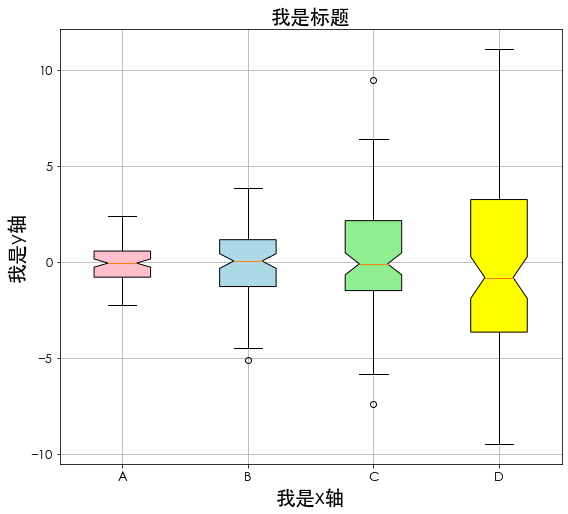

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# 获取随机数据
np.random.seed(129283729)
data = [np.random.normal(0, std, size=100) for std in range(1, 5)]
labels = ['A', 'B', 'C', 'D']   #柱子横坐标

fig, ax1 = plt.subplots(figsize=(9, 8))
# 增加notch
bplot1 = ax1.boxplot(data,
                     notch = True,
                     vert=True, # 纵向画图
                     patch_artist=True,  
                     labels=labels)  # x轴
ax1.set_title('我是标题')

#遍历每个箱子对象
colors = ['pink', 'lightblue', 'lightgreen', 'yellow']  
for patch,color in zip(bplot1['boxes'],colors): #两两配对
    patch.set_facecolor(color)   #设置每个箱子的颜色
    
plt.xlabel("我是x轴", fontsize = 20)
plt.ylabel("我是y轴", fontsize = 20)
plt.title('我是标题', fontsize = 20)
plt.tick_params(labelsize=13)
plt.grid()
plt.savefig("O_04.png")
plt.show()

### 基础箱线图 - 两组数据对比1

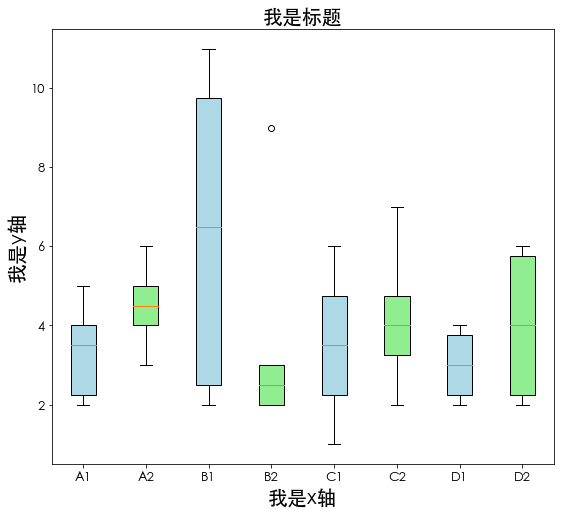

In [36]:
x1 = [2,3,4,2,4,5]
y1 = [1,2,3,4,5,6]

x2 = [5,6,4,3,4,5]
y2 = [2,3,4,4,5,7]

x3 = [2,2,4,9,10,11]
y3 = [4,4,3,2,2,3]

x4 = [9,3,2,2,3,2]
y4 = [5,6,6,3,2,2]

x_data = pd.DataFrame({"A1":x1, "B1":x2, "C1":x3, "D1":x4})
y_data = pd.DataFrame({"A2":y1, "B2":y2, "C2":y3, "D2":y4})

labels = ['A1','A2','B1','B2','C1','C2','D1','D2'] 
all_data = pd.concat([x_data, y_data],axis=1)

width = 0.4
fig, ax1 = plt.subplots(figsize=(9, 8))
bplot1 = ax1.boxplot(all_data,
                     vert=True,
                     patch_artist=True,  
                     widths = 0.4, labels=labels)

colors = ['lightblue', 'lightgreen','lightblue', 'lightgreen','lightblue', 'lightgreen','lightblue', 'lightgreen']  
for patch,color in zip(bplot1['boxes'],colors): #两两配对
    patch.set_facecolor(color)   #设置每个箱子的颜色
    
plt.xlabel("我是x轴", fontsize = 20)
plt.ylabel("我是y轴", fontsize = 20)
plt.title('我是标题', fontsize = 20)
plt.tick_params(labelsize=13)

plt.savefig("O_05.png")

plt.show()


### 基础箱线图 - 两组数据对比2

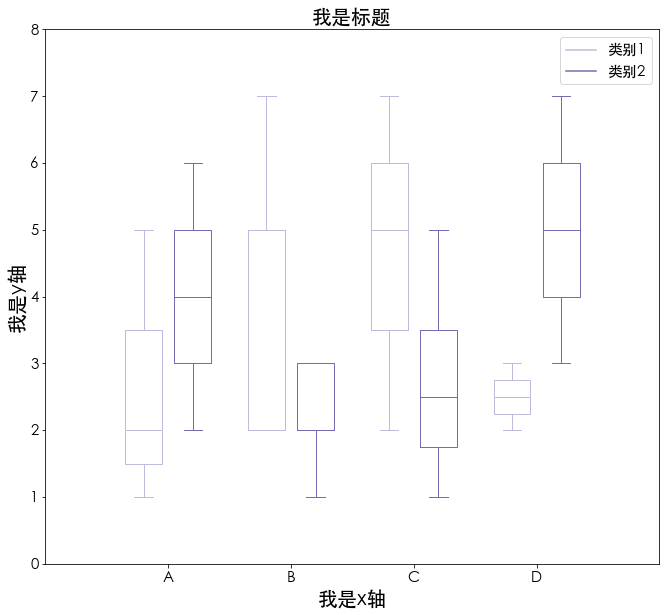

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟两组数据

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5], [2,3]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1], [3,7]]

ticks = ['A', 'B', 'C','D']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(figsize=(9, 8))

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#bcbddc') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#756bb1')

plt.plot([], c='#bcbddc', label='类别1')
plt.plot([], c='#756bb1', label='类别2')
plt.legend(fontsize=15)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2) 
plt.ylim(0, 8) # y刻度
plt.tight_layout()

plt.xlabel("我是x轴", fontsize = 20)
plt.ylabel("我是y轴", fontsize = 20)
plt.title('我是标题', fontsize = 20)
plt.tick_params(labelsize=15)
plt.savefig("O_06.png")
plt.show()

